<a href="https://colab.research.google.com/github/prativap1/KnnNB-project/blob/main/KnnNBproject_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Section I : Accessing the Data

Make a pandas DataFrame from the CSV

How many variables does the dataset contain?

What is the data about?

What are we trying to predict here?








In [35]:
data=pd.read_csv("/content/ortho_knnnb.csv")

In [36]:
# Showing overview of the dataset
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [37]:
#Printing Dimension of datasets
print("Dimension of dataset:", data.shape)
print("Number of rows in the dataset:", data.shape[0])
print("Number of columns in the dataset:", data.shape[1])


Dimension of dataset: (310, 7)
Number of rows in the dataset: 310
Number of columns in the dataset: 7


In [38]:
# printing attributes (columns) name
print("Column Names:",data.columns.values)

Column Names: ['pelvic_incidence' 'pelvic_tilt numeric' 'lumbar_lordosis_angle'
 'sacral_slope' 'pelvic_radius' 'degree_spondylolisthesis' 'class']


# Section II : Exploratory Data Analysis


    Perform some descriptive statistics and make a note of your findings
    Plot appropriate graphs to understand the relation between the variables.
    Point out any observations and comment on the strength of the relationships if any.



In [39]:
#missing values
data.isna().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [40]:
data.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [41]:
data['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [42]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [43]:
corr= data.corr()
corr

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'status of patient')

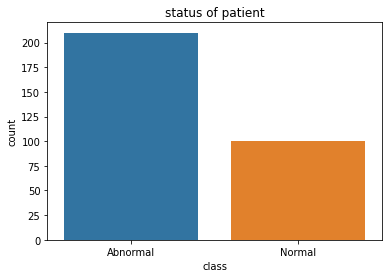

In [44]:
sns.countplot('class',data = data)
plt.title("status of patient")


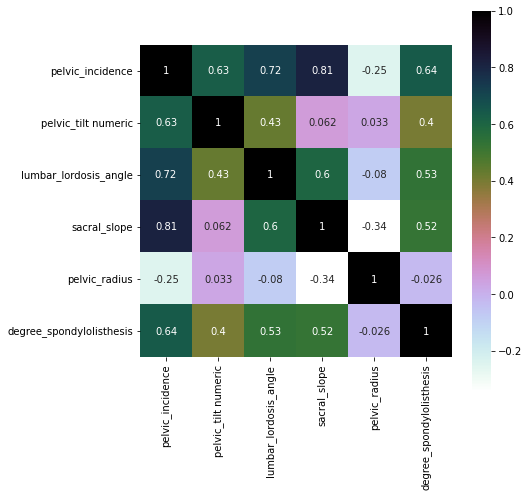

In [45]:
#heatmap 
plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()


# Section III : Prepare data for Training!

    Make a new column symptom_class with the abnormal rows as 1 and the normal rows as 0, drop the class column
    Split the entire dataset into independent features and symptoms as the response variable
    Normalize the variables.



In [46]:
data = data.rename(columns={'class': 'symptom_class'})
data.symptom_class.value_counts()


Abnormal    210
Normal      100
Name: symptom_class, dtype: int64

In [47]:
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [48]:


data["symptom_class"] = data["symptom_class"].replace({"Abnormal":1,"Normal":0})
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


In [49]:
data["symptom_class"].value_counts()
print(data["symptom_class"])

0      1
1      1
2      1
3      1
4      1
      ..
305    0
306    0
307    0
308    0
309    0
Name: symptom_class, Length: 310, dtype: int64


In [50]:
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [52]:

train, test = train_test_split(data, test_size=0.20,random_state = 1)
print(train)


     pelvic_incidence  ...  symptom_class
307         61.446597  ...              0
0           63.027817  ...              1
132         69.626283  ...              1
208         87.679087  ...              1
62          44.529051  ...              1
..                ...  ...            ...
203         73.635962  ...              1
255         67.538182  ...              0
72          84.974132  ...              1
235         63.929470  ...              0
37          35.703458  ...              1

[248 rows x 7 columns]


In [53]:
train_x = train.drop(['symptom_class'], axis = 1)
train_y = train['symptom_class']             

test_x = test.drop(['symptom_class'],axis = 1)
test_y = test['symptom_class'] 


In [54]:
print('Dimension of train_x :',train_x.shape)
print('Dimension of train_y :',train_y.shape)
print('Dimension of test_x :',test_x.shape)
print('Dimension of test_y :',test_y.shape)
print(train_y)

Dimension of train_x : (248, 6)
Dimension of train_y : (248,)
Dimension of test_x : (62, 6)
Dimension of test_y : (62,)
307    0
0      1
132    1
208    1
62     1
      ..
203    1
255    0
72     1
235    0
37     1
Name: symptom_class, Length: 248, dtype: int64



# Section IV : Training with KNN

    Use train_test_split from sklearn and split the parameters and classes into train and test sets
    Starting with three nearest neighbours , train your KNN model and make a note of accuracy and other diagnostics for both training and test sets.
    Try with increasing the k value and check if there is any improvement in model performance. Use different value to arrive at the optimal value of k.
    Evaluate your final model using appropriate metrics for classification and comment on them.



In [55]:
#Using KNN Classifier for model building # 3-82,6-85,9-80

from sklearn.neighbors import KNeighborsClassifier
train_accuracy=[]
test_accuracy=[]
for k in range(3, 10):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(train_x,train_y)
  train_pred=knn.predict(train_x)
  train_score=accuracy_score(train_pred,train_y)
  test_pred= knn.predict(test_x)
  test_score=(round(accuracy_score(test_pred,test_y)*100,2))
  
  test_accuracy.append(test_score) 
  print("Test Accuracy: ",test_score,"Value of K: ",k)



Test Accuracy:  83.87 Value of K:  3
Test Accuracy:  80.65 Value of K:  4
Test Accuracy:  85.48 Value of K:  5
Test Accuracy:  83.87 Value of K:  6
Test Accuracy:  83.87 Value of K:  7
Test Accuracy:  80.65 Value of K:  8
Test Accuracy:  80.65 Value of K:  9


In [56]:
# Predict Symptom_class for test data
pred = knn.predict(test_x)
pred


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

# Section V : Training with Naive Bayes

In [57]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(train_x, train_y)

GaussianNB()

In [58]:
#Predicting the Test set results
y_pred = nvclassifier.predict(test_x)
print(y_pred)


[1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0
 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1]


In [59]:
#lets see the actual and predicted value 
test = test.reset_index(drop = True)
test["pred_class"] = y_pred
test.head()


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class,pred_class
0,67.412538,17.442797,60.144640,49.969741,111.123970,33.157646,1,1
1,63.026300,27.336240,51.605017,35.690060,114.506608,7.439870,0,1
2,91.468741,24.508177,84.620272,66.960564,117.307897,52.623047,1,1
3,72.560702,17.385191,52.000000,55.175511,119.193724,32.108537,1,1
4,54.741775,12.095072,41.000000,42.646703,117.643219,40.382327,1,1


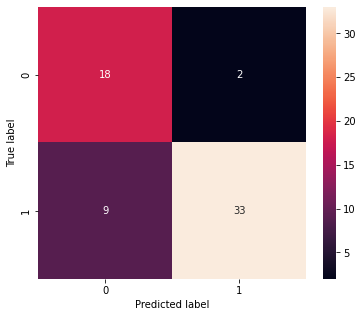

In [60]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [61]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred += cm[row,c]
        else:
            falsePred += cm[row,c]
print("*"*70)
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print("*"*70)
acc = corrPred/cm.sum()
print ('Accuracy of the Naive Bayes Clasification is {}% '.format(round(acc*100,2)))
print("*"*70)


**********************************************************************
Correct predictions:  51
False predictions 11
**********************************************************************
Accuracy of the Naive Bayes Clasification is 82.26% 
**********************************************************************


In [62]:
#finding accuracy from Sklearn.metrics
from sklearn.metrics import accuracy_score

print('The accuracy of the NB is {}%'.format(round(accuracy_score(y_pred,test_y)*100,2)))


The accuracy of the NB is 82.26%


In [63]:
#predicted_probabilities
nvclassifier.predict_proba(test_x)[:10]


array([[2.30544189e-05, 9.99976946e-01],
       [4.56381618e-01, 5.43618382e-01],
       [5.88570384e-17, 1.00000000e+00],
       [7.90472863e-05, 9.99920953e-01],
       [3.94244355e-06, 9.99996058e-01],
       [2.79949544e-04, 9.99720050e-01],
       [9.92581878e-01, 7.41812234e-03],
       [6.69383180e-17, 1.00000000e+00],
       [1.21419008e-26, 1.00000000e+00],
       [2.56897665e-02, 9.74310233e-01]])